## XGBoost

In [1]:
#Importing all of the packages that we are going to need to Boost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Importing our data set
df = pd.read_csv('pipeline_2/csv_files/p2_comp2_final_use.csv', index_col=0)
df.head()

,X1,X2,X3_Education_Bins,X4_Marital_Bins,X5_Age_Bins,X6_Payment_Bins,X7_Payment_Bins,X8_Payment_Bins,X9_Payment_Bins,X10_Payment_Bins,...,X17_abs,X17_sign,X17_monthlydif,X18_binary,X19_binary,X20_binary,X21_binary,X22_binary,X23_binary,Y
0,-1.744156,2,2,1,1,2,2,1,1,2,...,-2.019201,0,1,0,1,0,0,0,0,1
1,-0.043526,2,2,2,1,1,2,2,2,2,...,-0.288536,1,1,0,1,1,1,0,1,1
2,-0.351920,2,2,2,2,2,2,2,2,2,...,0.226085,1,1,1,1,1,1,1,1,0
3,-0.937871,2,2,1,2,2,2,2,2,2,...,0.479649,1,1,1,1,1,1,1,1,0
4,-0.937871,1,2,1,3,1,2,1,2,2,...,0.305020,1,1,1,1,1,1,1,1,0


In [3]:
# Splitting our data set into X (variable) and Y (target)
X, Y = df.iloc[:,:-1],df.iloc[:,-1]

In [4]:
# Creating the DMatrix which is used with XGBoost
df_dmatrix = xgb.DMatrix(data=X,label=Y)

In [5]:
# Going to split our data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2019)

In [6]:
# Going to create our XGBoost model. We are using Classifier since trying to predict 
xg_reg = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.5, learning_rate = 0.5, max_depth = 4, 
                           n_estimators = 150, random_state=2019)

# Fitting our model
xg_reg.fit(X_train,Y_train)

# Making predictions on our model
preds = xg_reg.predict(X_test)

In [7]:
# Printing out the 'RMSE' in order to see how accurate we were
rmse = np.sqrt(mean_squared_error(Y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.459166


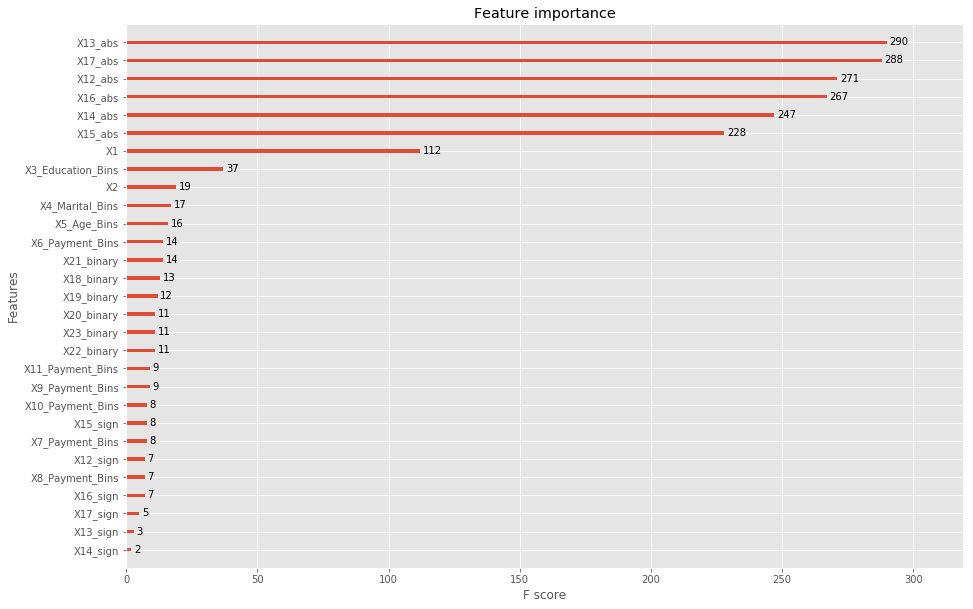

In [9]:
# Plotting the feature importance of each variable 
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [10]:
# Going to use k-fold in order to cross validate the model
params = {"objective":"reg:linear",'colsample_bytree': 0.5,'learning_rate': 0.5,
                'max_depth': 4 ,'random_state': 2019}

cv_results = xgb.cv(dtrain=df_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=2019)

[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[15:38:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

In [11]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.430849,0.000996,0.431597,0.001024
1,0.405616,0.002435,0.406803,0.001080
2,0.394569,0.001094,0.397148,0.002311
3,0.390221,0.000782,0.393437,0.002743
4,0.388473,0.001086,0.392569,0.002582


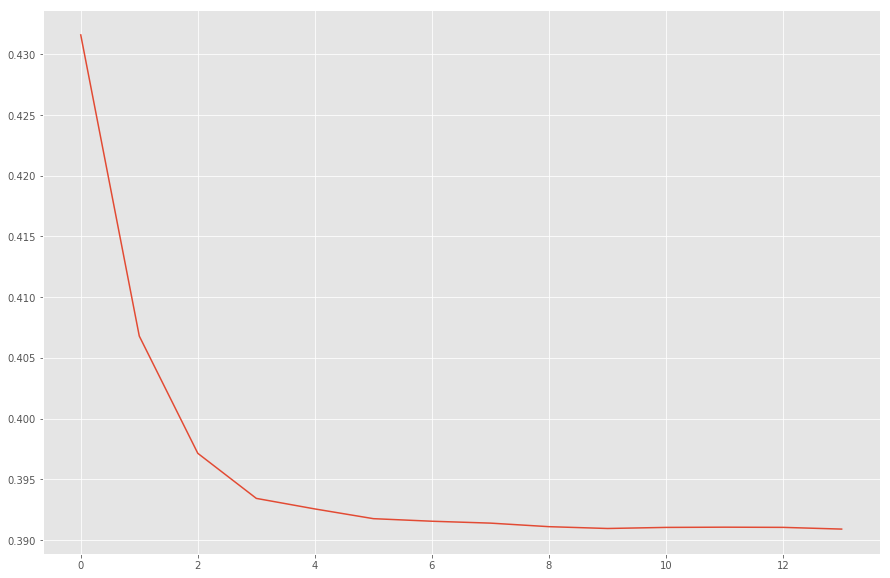

In [12]:
# Visualizing the change in the rmse as more and more trees are built
cv_results['test-rmse-mean'].plot()

This clearly shows are more trees are build the model learns and constantly produces a lower RMSE. By the time we get to our specificed number of trees in the model, **50** we have a very low RMSE.

In [13]:
# Printing out our last boosting round. Going to compare to our 
## originally calculated RMSE
print((cv_results["test-rmse-mean"]).tail(1))

13    0.39091
Name: test-rmse-mean, dtype: float64


 Through k-fold we got an RMSE that was actually worse than our original one; however the two results were very similar.